In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [2]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Physic955',
    'database': 'Basketball_Reference'
}

password = quote_plus("Physic955")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [3]:
query = """
            SELECT p.Name, COUNT(mjt.TrophyID) AS Trophy_Count, p.PTS
            FROM michael_jordan_trophy mjt
            JOIN players p ON mjt.PlayerID = p.PlayerID
            JOIN player_positions pp ON p.PlayerID = pp.PlayerID
            JOIN positions pos ON pp.PositionID = pos.PositionID
            WHERE pos.PositionName = 'Point Guard'
            GROUP BY p.PlayerID
            ORDER BY Trophy_Count DESC;
        """
pointguards = pd.read_sql(query, engine)
        
print(pointguards)

                       Name  Trophy_Count   PTS
0     Giannis Antetokounmpo             5  23.9
1               Luka Dončić             5  28.6
2             Stephen Curry             3  24.7
3              LeBron James             3  27.0
4                Chris Paul             3  17.0
5             Jalen Brunson             2  18.1
6   Shai Gilgeous-Alexander             2  24.4
7                 Ja Morant             2  22.6
8            Damian Lillard             2  25.1
9              James Harden             2  24.1
10        Russell Westbrook             1  21.2
11            Derrick White             1  13.0
12         Donovan Mitchell             1  24.7
13             De'Aaron Fox             1  21.5
14             Devin Booker             1  24.4


In [4]:
top3_pointguards = pointguards.head(3)
print(top3_pointguards)

                    Name  Trophy_Count   PTS
0  Giannis Antetokounmpo             5  23.9
1            Luka Dončić             5  28.6
2          Stephen Curry             3  24.7


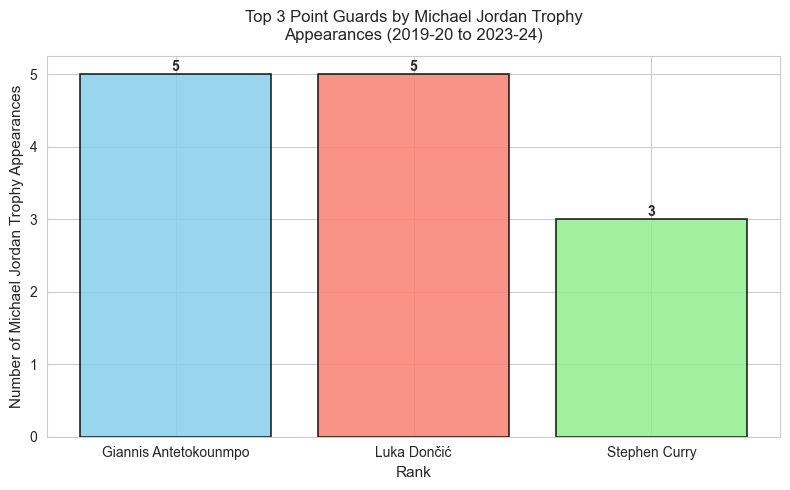

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")


bars = plt.bar(range(len(top3_pointguards)), 
               top3_pointguards['Trophy_Count'],
               color=['skyblue', 'salmon', 'lightgreen'], 
               edgecolor='black', 
               linewidth=1.2,
               alpha=0.85)


plt.xlabel('Rank', fontsize=11)
plt.ylabel('Number of Michael Jordan Trophy Appearances', fontsize=11)
plt.title('Top 3 Point Guards by Michael Jordan Trophy\nAppearances (2019-20 to 2023-24)', 
          fontsize=12, pad=12)


plt.xticks(range(len(top3_pointguards)), 
           top3_pointguards['Name'].apply(lambda x: x.title()), 
           fontsize=10)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.tight_layout()
plt.savefig('point_guard_recommendations.png', dpi=300, bbox_inches='tight')
plt.show()